In [42]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
import math
from PIL import Image
import IPython.display

In [43]:
def imshow(image, width=None):
    _, ret = cv2.imencode('.jpg', image)
    i = IPython.display.Image(data=ret, width=width)
    IPython.display.display(i)


In [44]:
image = cv2.imread('/home/juanca632/PersonalProjects/stage/wavelet-transform/image_gray.jpg', cv2.IMREAD_GRAYSCALE)

In [45]:
def jpg_to_pgm(jpg_path, pgm_path):
    # Abre la imagen JPG
    image = Image.open(jpg_path)

    # Convierte la imagen a escala de grises
    image_gray = image.convert('L')

    # Guarda la imagen en formato PGM
    image_gray.save(pgm_path)

def interpret_pgm(pgm_path):
    # Abre la imagen PGM
    image = Image.open(pgm_path)

    # Obtiene la información de la imagen
    width, height = image.size
    max_gray_value = image.getextrema()[1]

    # Accede a los píxeles de la imagen
    pixels = list(image.getdata())
    # Haces algo con los píxeles...
    # Por ejemplo, puedes imprimir los valores de los primeros 10 píxeles
    for i in range(150000):
        pixels[i] = pixels[i] -100
    
    return pixels

    # Puedes realizar cualquier otra operación que necesites con los píxeles

# Ruta del archivo JPG
jpg_file = '/home/juanca632/PersonalProjects/stage/wavelet-transform/image_gray.jpg'

# Ruta del archivo PGM de salida
pgm_file = 'imagen.pgm'

# Transformar JPG a PGM
# jpg_to_pgm(jpg_file, pgm_file)

# Interpretar el archivo PGM
pixels = interpret_pgm(pgm_file)


In [46]:
pixels = np.array(pixels)
image_array = pixels.reshape((512, 512))

[[ 8 18 16 ... 10 19  8]
 [23 11 20 ...  4  8 11]
 [17 38 22 ... 13 31  5]
 ...
 [64 79 68 ... 76 55 53]
 [57 62 59 ... 56 54 77]
 [67 54 60 ... 80 58 73]]


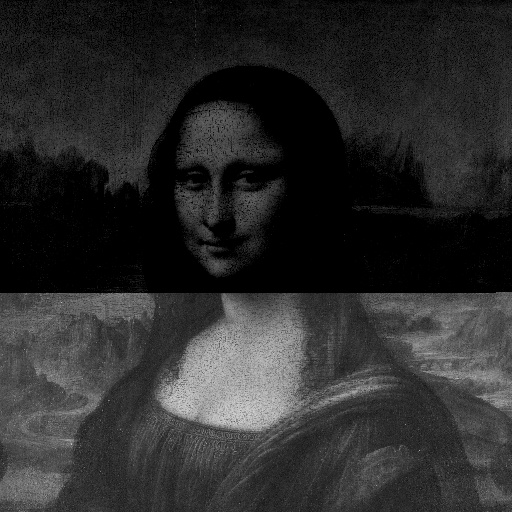

In [47]:
print(image_array)
imshow(image_array)

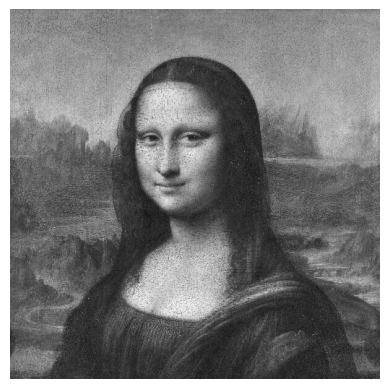

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_pgm_image(pgm_path):
    # Lee la imagen PGM utilizando matplotlib
    image = mpimg.imread(pgm_path)

    # Muestra la imagen en una figura
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Ruta del archivo PGM
pgm_file = 'imagen.pgm'

# Mostrar la imagen PGM
show_pgm_image(pgm_file)

[[203 132 131 227 219 139  64 125 144 115]
 [191 207 191  75  86  10 117 121 248 170]
 [240 104 220 223 183  65 242  75 175 189]
 [ 99  19 131  35 170 182  76  11 131 168]
 [198 221 143  77 228 100 255 211 170   7]
 [163 211 203 150 127 143 237  22 121  65]
 [186  40 150 169 144   3  28  71  91   5]
 [191 222 253  61 180 200 154 233 133 118]
 [129 194   4 193  22 118 160 181  47 154]
 [191 106 172  50 131 120 127  70 105  15]]


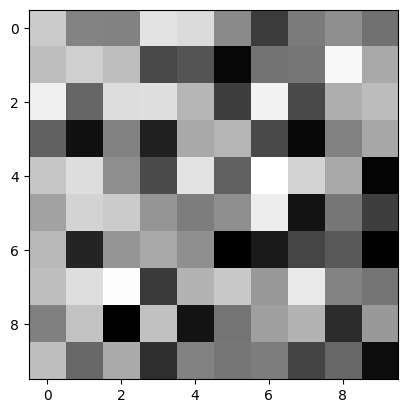

In [49]:
# Crear una matriz 10x10 con valores aleatorios enteros entre 0 y 255
matrix = np.random.randint(0, 256, size=(10, 10))

# Imprimir la matriz
print(matrix)
plt.imshow(matrix,  cmap="gray")
plt.show()

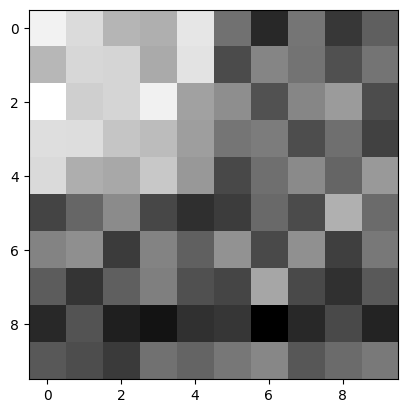

In [50]:
# matrix = cv2.imread("/home/juanca632/PersonalProjects/stage/wavelet-transform/descarga.jpg", cv2.IMREAD_GRAYSCALE)

def haar_wavelet_transform(matrix):
    n = int(matrix.shape[0])
    n_half = int(n /2)
    transformed_matrix = np.zeros((n,n))

    if(n >= 2):
        for i in range(0, n):
            aux = 0
            aux2 = int(n_half + aux)
            for j in range(0, n, 2):

                sum = (matrix[i, j] + matrix[i, j+1]) / 2
                dif = (matrix[i, j] - matrix[i, j+1]) / 2
                transformed_matrix[i,aux] = sum
                transformed_matrix[i,aux2] = dif
                aux = aux + 1
                aux2 = aux2 + 1
        transformed_matrix2 = np.copy(transformed_matrix)
        for j in range(0, n_half):
            aux = 0
            aux2 = int(n_half + aux)
            for i in range(0, n, 2):

                sum = (transformed_matrix[i, j] + transformed_matrix[i+1, j]) / 2
                dif = (transformed_matrix[i, j] - transformed_matrix[i+1, j]) / 2

                transformed_matrix2[aux,j] = sum
                transformed_matrix2[aux2,j] = dif
                aux = aux + 1
                aux2 = aux2 + 1

        transformed_matrix3 = transformed_matrix2[:n_half,:n_half]

    return transformed_matrix2, transformed_matrix3

image_result, image_aprox = haar_wavelet_transform(matrix)

# print(matrix)
# print("\n")
# print(image_result)
plt.imshow(image_result,  cmap="gray")
plt.show()



[[203 132 131 227 219 139  64 125 144 115]
 [191 207 191  75  86  10 117 121 248 170]
 [240 104 220 223 183  65 242  75 175 189]
 [ 99  19 131  35 170 182  76  11 131 168]
 [198 221 143  77 228 100 255 211 170   7]
 [163 211 203 150 127 143 237  22 121  65]
 [186  40 150 169 144   3  28  71  91   5]
 [191 222 253  61 180 200 154 233 133 118]
 [129 194   4 193  22 118 160 181  47 154]
 [191 106 172  50 131 120 127  70 105  15]]



[[203. 132. 131. 227. 219. 139.  64. 125. 144. 115.]
 [191. 207. 191.  75.  86.  10. 117. 121. 248. 170.]
 [240. 104. 220. 223. 183.  65. 242.  75. 175. 189.]
 [ 99.  19. 131.  35. 170. 182.  76.  11. 131. 168.]
 [198. 221. 143.  77. 228. 100. 255. 211. 170.   7.]
 [163. 211. 203. 150. 127. 143. 237.  22. 121.  65.]
 [186.  40. 150. 169. 144.   3.  28.  71.  91.   5.]
 [191. 222. 253.  61. 180. 200. 154. 233. 133. 118.]
 [129. 194.   4. 193.  22. 118. 160. 181.  47. 154.]
 [191. 106. 172.  50. 131. 120. 127.  70. 105.  15.]]


Text(0.5, 1.0, 'Reconstruida')

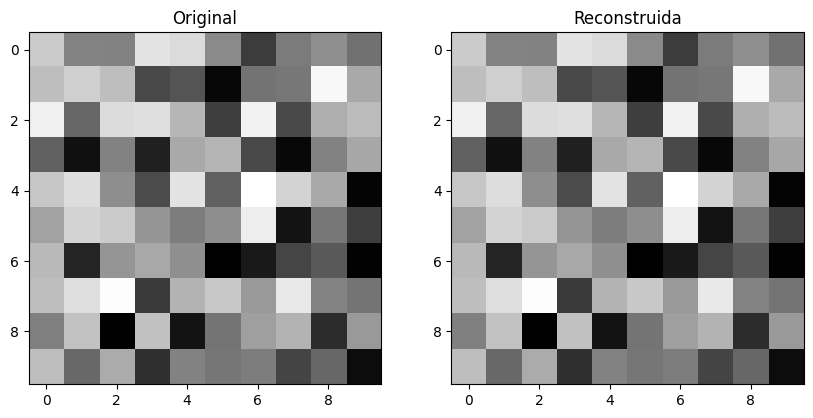

In [51]:
def inverse_haar_wavelet_transform(transformed_matrix):
    n = transformed_matrix.shape[0]
    n_half = n // 2
    reconstructed_matrix = np.copy(transformed_matrix)

    if n >= 2:
        # # Reconstrucción vertical
        for j in range(n_half):
            aux = 0
            aux2 = n_half + aux
            for i in range(0, n, 2):
                s = transformed_matrix[aux, j]
                d = transformed_matrix[aux2, j]
                reconstructed_matrix[i, j] = s + d
                reconstructed_matrix[i + 1, j] = s - d
                aux += 1
                aux2 += 1

        # Reconstrucción horizontal
        reconstructed_matrix2 = np.zeros_like(reconstructed_matrix)
        for i in range(n):
            aux = 0
            aux2 = n_half + aux
            for j in range(0, n, 2):
                s = reconstructed_matrix[i, aux]
                d = reconstructed_matrix[i, aux2]
                reconstructed_matrix2[i, j] = s + d
                reconstructed_matrix2[i, j + 1] = s - d
                aux += 1
                aux2 += 1
        return reconstructed_matrix2

    return transformed_matrix

# Ejemplo de matriz transformada
transformed_matrix = np.array([[6, -2, 0, 0],
                               [5, -1, 1, 0],
                               [2, 0, -2, 0],
                               [1, 1, 1, -3]])

image_original = inverse_haar_wavelet_transform(image_result)

print(matrix)
print("\n\n")
print(image_original)
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(matrix, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(image_original, cmap='gray')
axes[1].set_title('Reconstruida')
